## Tugas Praktikum 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import hdbscan

1. Pilih salah satu dataset nyata dari sklearn.datasets (misalnya iris dataset atau digits dataset).

In [50]:
iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df['Species'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


iris.target berisi label asli (target) yaitu 0, 1, atau 2 untuk spesies bunga: 0 = Iris setosa, 1 = Iris versicolor, 2 = Iris virginica.

In [44]:
X = df[iris.feature_names].values

print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

2. Lakukan clustering dengan HDBSCAN.

In [45]:
# Make HDBSCAN model
clusterer = hdbscan.HDBSCAN()
cluster_labels = clusterer.fit_predict(X)

3. Laporkan hasil:
    - Jumlah cluster yang terbentuk.
    - Banyaknya noise.
    - Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu, dikarenakan visualisasi hanya dapat dilakukan hingga 3 dimensi).

In [46]:
# Calculate number of clusters and noise points
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)

print("Jumlah Cluster Terbentuk:", n_clusters)
print("Jumlah Noise:", n_noise)

Jumlah Cluster Terbentuk: 2
Jumlah Noise: 0


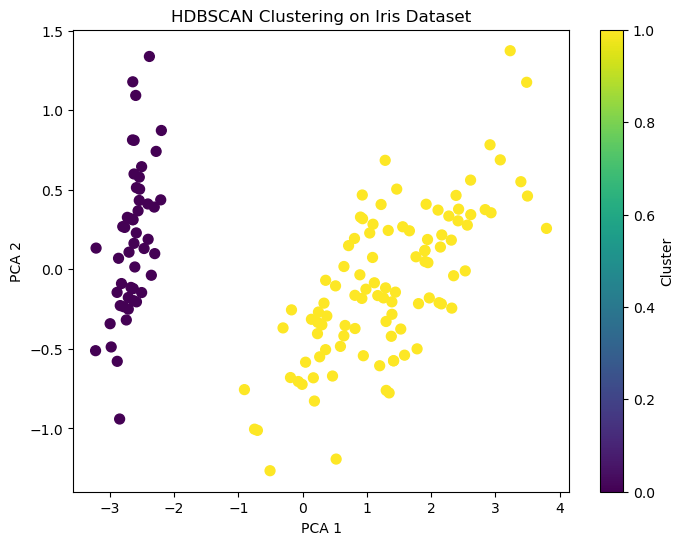

In [47]:
# Visualize clusters using PCA (2D)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('HDBSCAN Clustering on Iris Dataset')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()


Visualisasi PCA digunakan untuk menampilkan hasil clustering HDBSCAN dalam dua dimensi. Hasil 2 cluster menunjukkan bahwa HDBSCAN menganggap hanya ada dua kelompok yang signifikan dalam data iris, kemungkinan karena dua spesies memiliki kemiripan fitur, sedangkan satu spesies lebih terpisah jelas.

4. Buat analisis singkat: apakah hasil clustering HDBSCAN sesuai dengan label asli dataset tersebut?

In [52]:
# Compare clusters with true labels
true_labels = df["Species"]
print(pd.crosstab(true_labels, cluster_labels))

col_0     0   1
Species        
0        50   0
1         0  50
2         0  50


Hasil clustering HDBSCAN sebagian sesuai dengan label asli. HDBSCAN mampu memisahkan dengan baik antara setosa (0) dan dua spesies lainnya, namun tidak dapat membedakan dengan jelas antara versicolor (1) dan virginica (2) karena keduanya memiliki kemiripan karakterikstik.